<a href="https://colab.research.google.com/github/Cafta/PUC/blob/main/2024_AI_Everton/Aula_10_Relat%C3%B3rio_09_Construindo_uma_Rede_Neural_Convolucional_no_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1: Instando o TensorFlow 2.0

In [1]:
!pip uninstall -y tensorflow #Comando necessário, pois o TensorFlow-gpu não desinstala a versão mais recente do Tensorflow, pode gerar conflitos.

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0


In [2]:
!pip install tensorflow-gpu==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 32.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

## Etapa 2: Importando as bibliotecas

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.8.0'

## Etapa 3: Pré-processamento

### Carregando a base de dados Cifar10

In [4]:
# Configurando o nome das classes que serão previstas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Carregando a base de dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


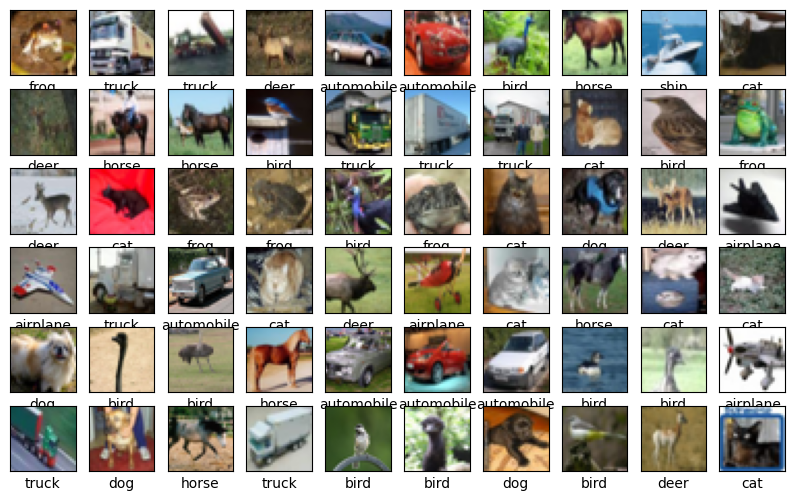

In [16]:
# Visualizando imagens Exemplos
import matplotlib.pyplot as plt

# Visualize the first 60 images from the training set.
plt.figure(figsize=(10, 6))
for i in range(60):
    plt.subplot(6, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


### Normalização das imagens

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
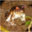

In [8]:
X_train[0]

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test = X_test / 255.0

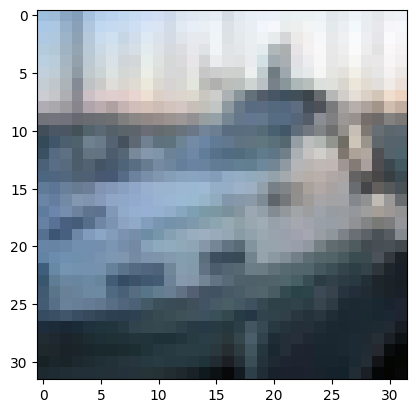

In [ ]:
plt.imshow(X_test[2])

## Etapa 4: Construindo a Rede Neural Convolucional

### Definindo o modelo

In [6]:
model = tf.keras.models.Sequential()

### Adicionado a primeira camada de convolução

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel): 3
- padding (preenchimento): same
- função de ativação: relu
- input_shape (camada de entrada): (32, 32, 3)


In [7]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adicionando a segunda camada de convolução e a camada de max-pooling

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel):3
- padding (preenchimento): same
- função de ativação: relu

Hyper-parâmetros da camada de max-pooling:
- pool_size: 2
- strides: 2
- padding: valid

In [8]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [9]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adicionando a terceira camada de convolução

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [10]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adicionando a quarta camada de convolução e a camada de max pooling

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

Hyper-parâmetros da camada de max pooling:

    pool_size: 2
    strides: 2
    padding: valid


In [11]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [12]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adicionando a camada de flattening

In [13]:
model.add(tf.keras.layers.Flatten())

### Adicionando a primeira camada densa (fully-connected)

Hyper-parâmetros da camada densa:
- units/neurônios: 128
- função de ativação: relu

In [14]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adicionando a camada de saída

Hyper-parâmetros da camada de saída:

 - units/neurônios: 10 (número de classes)
 - activation: softmax


In [15]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

### Compilando o modelo

#### sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [28]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

array([3], dtype=uint8)

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Treinando o modelo

In [30]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 213s 136ms/step - loss: 1.6566 - sparse_categorical_accuracy: 0.4570
Epoch 2/10
1563/1563 [==============================] - 212s 136ms/step - loss: 1.0891 - sparse_categorical_accuracy: 0.6200
Epoch 3/10
1563/1563 [==============================] - 211s 135ms/step - loss: 0.9227 - sparse_categorical_accuracy: 0.6796
Epoch 4/10
1563/1563 [==============================] - 210s 134ms/step - loss: 0.7956 - sparse_categorical_accuracy: 0.7220
Epoch 5/10
1563/1563 [==============================] - 209s 134ms/step - loss: 0.6982 - sparse_categorical_accuracy: 0.7548
Epoch 6/10
1563/1563 [==============================] - 207s 133ms/step - loss: 0.6130 - sparse_categorical_accuracy: 0.7851
Epoch 7/10
1563/1563 [==============================] - 209s 134ms/step - loss: 0.5344 - sparse_categorical_accuracy: 0.8136
Epoch 8/10
1563/1563 [==============================] - 209s 133ms/step - loss: 0.4659 - sparse_categorical_accuracy: 0.8367


### Avaliando o modelo

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 30ms/step - loss: 1.3457 - sparse_categorical_accuracy: 0.6852


In [32]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.6851999759674072


In [33]:
test_loss

1.345726490020752

In [20]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model1.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [17]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 322s 206ms/step - loss: 1.5445 - sparse_categorical_accuracy: 0.4820
Epoch 2/15
1563/1563 [==============================] - 307s 197ms/step - loss: 1.0463 - sparse_categorical_accuracy: 0.6348
Epoch 3/15
1563/1563 [==============================] - 312s 199ms/step - loss: 0.8965 - sparse_categorical_accuracy: 0.6858
Epoch 4/15
1563/1563 [==============================] - 308s 197ms/step - loss: 0.7902 - sparse_categorical_accuracy: 0.7239
Epoch 5/15
1563/1563 [==============================] - 311s 199ms/step - loss: 0.6955 - sparse_categorical_accuracy: 0.7581
Epoch 6/15
1563/1563 [==============================] - 308s 197ms/step - loss: 0.6048 - sparse_categorical_accuracy: 0.7878
Epoch 7/15
1563/1563 [==============================] - 321s 205ms/step - loss: 0.5303 - sparse_categorical_accuracy: 0.8143
Epoch 8/15
1563/1563 [==============================] - 306s 196ms/step - loss: 0.4661 - sparse_categorical_accuracy: 0.8366


In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

313/313 [==============================] - 17s 53ms/step - loss: 1.7124 - sparse_categorical_accuracy: 0.6716
Test accuracy: 0.6715999841690063
Test loss: 1.7123745679855347


In [21]:
model1.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 337s 215ms/step - loss: 1.5298 - sparse_categorical_accuracy: 0.4905 - val_loss: 1.1378 - val_sparse_categorical_accuracy: 0.6002
Epoch 2/15
1563/1563 [==============================] - 324s 208ms/step - loss: 1.0395 - sparse_categorical_accuracy: 0.6347 - val_loss: 0.9778 - val_sparse_categorical_accuracy: 0.6626
Epoch 3/15
1563/1563 [==============================] - 329s 210ms/step - loss: 0.8858 - sparse_categorical_accuracy: 0.6894 - val_loss: 0.9691 - val_sparse_categorical_accuracy: 0.6597
Epoch 4/15
1563/1563 [==============================] - 326s 208ms/step - loss: 0.7655 - sparse_categorical_accuracy: 0.7301 - val_loss: 0.9453 - val_sparse_categorical_accuracy: 0.6824
Epoch 5/15
1563/1563 [==============================] - 327s 209ms/step - loss: 0.6702 - sparse_categorical_accuracy: 0.7638 - val_loss: 0.9799 - val_sparse_categorical_accuracy: 0.6934
Epoch 6/15
1563/1563 [==============================] - 323s 206ms/ste

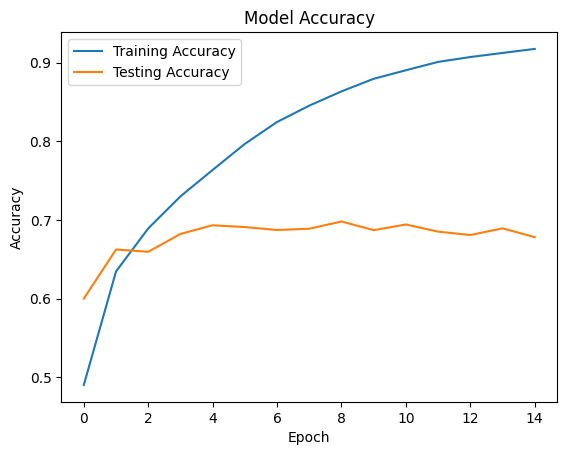

In [28]:
# construindo uma curva de acurácia do modelo treinado
import matplotlib.pyplot as plt

# Get the training and testing accuracy values from the model's history
history = model1.history.history
training_accuracy = history['sparse_categorical_accuracy']
testing_accuracy = history['val_sparse_categorical_accuracy']

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the training and testing accuracy curves
ax.plot(training_accuracy, label='Training Accuracy')
ax.plot(testing_accuracy, label='Testing Accuracy')

# Set the title and axis labels
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

# Add a legend and show the plot
ax.legend()
plt.show()
